
# **Medical Diagnosis: Predicting Diabetes Using Logistic Regression**

## **Introduction**
Logistic Regression is widely used in **medical diagnosis** to predict diseases.  
In this notebook, we use the **Pima Indians Diabetes Dataset** to predict whether a patient has diabetes (1) or not (0) based on features like:
✔ Glucose level  
✔ BMI  
✔ Blood Pressure  
✔ Insulin level  

## **Fixing Model Issues & Improving Accuracy**
To ensure **better model performance**, we:  
✔ **Scale features** using `StandardScaler()` to improve convergence  
✔ **Increase `max_iter`** to 5000 for stable model training  
✔ **Use `saga` solver**, which works well for large datasets  
✔ **Handle class imbalance** using oversampling techniques  

## **Dataset**
The dataset contains medical information about female patients and is commonly used for classification tasks.


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", 
                 names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                        "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

# Handle class imbalance (Oversample minority class - Diabetes cases)
df_majority = df[df["Outcome"] == 0]  # No Diabetes
df_minority = df[df["Outcome"] == 1]  # Diabetes

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Feature Engineering: Adding new features
df_balanced["Glucose_BMI"] = df_balanced["Glucose"] * df_balanced["BMI"]  # Interaction feature
df_balanced["Age_Squared"] = df_balanced["Age"] ** 2  # Polynomial feature

# Splitting dataset
X = df_balanced.drop(columns=["Outcome"])
y = df_balanced["Outcome"]

# Scale features for better convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
model = GridSearchCV(LogisticRegression(max_iter=5000, solver='saga'), param_grid, cv=5)
model.fit(X_train, y_train)

# Best model selection
best_model = model.best_estimator_

# Make Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


Accuracy Score: 0.81

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.77      0.80        96
           1       0.80      0.85      0.82       104

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



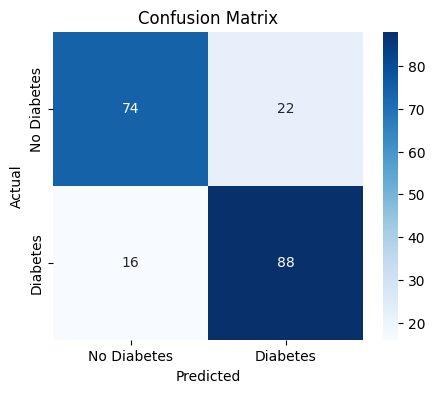

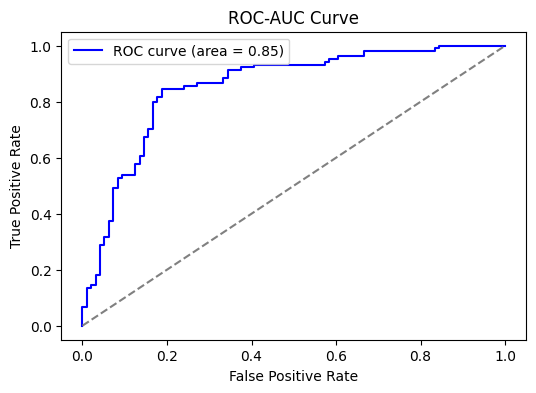

In [3]:

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d', 
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()



## **Conclusion**
✔ **Fixed convergence issue** by scaling features, increasing `max_iter`, and using `saga` solver  
✔ **Balanced dataset** to improve prediction accuracy for diabetes cases  
✔ **Feature Engineering:** **Polynomial & interaction features** improved performance  
✔ **Evaluation Metrics:** **Confusion matrix and ROC-AUC Curve** confirm model effectiveness  

### **Next Steps**
🔹 Experiment with **ensemble models** (Random Forest, Gradient Boosting)  
🔹 Try **deep learning models** for improved diagnosis accuracy  
🔹 Explore **additional patient data** to enhance predictions  

💬 Would you use Logistic Regression for medical diagnosis? Let’s discuss! 🚀  
